In [ ]:
# SGD optim
import torch
import torch.optim as optim

w  = torch.tensor([6], dtype=torch.float32)
# Nesterov
optimizer = optim.SGD(params=[w] , lr=0.1,momentum=0.8,nesterov=True)


SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0.8
    nesterov: True
    weight_decay: 0
)

In [ ]:
# 1

import torch
import torch.optim as optim

optim.

def func(x):
    return 0.2 * (x - 2) ** 2 - 0.3 * torch.cos(4 * x)


x0 = 0.0 # начальное значение точки минимума
lr = 0.1 # шаг обучения
N = 200 # число итераций градиентного алгоритма

# optimizer = optim.SGD(params=[w] , lr=0.1,momentum=0.8,nesterov=True)
x = torch.tensor([x0] , requires_grad=True)
for i in range(N):
    y = func(x)
    y.backward()
    x.data = x.data - lr * x.grad
    x.grad.zero_()


In [4]:
import torch
import torch.optim as optim

def func(x):
    return 0.2 * (x - 2) ** 2 - 0.3 * torch.cos(4 * x)


lr = 0.1 # шаг обучения
x0 = 0.0 # начальное значение точки минимума
N = 200 # число итераций градиентного алгоритма

x = torch.tensor([x0], requires_grad=True, dtype=torch.float32)
optimizer = optim.RMSprop([x], lr=lr)

for i in range(N):
    y = func(x)
    y.backward()
    optimizer.step()
    optimizer.zero_grad()

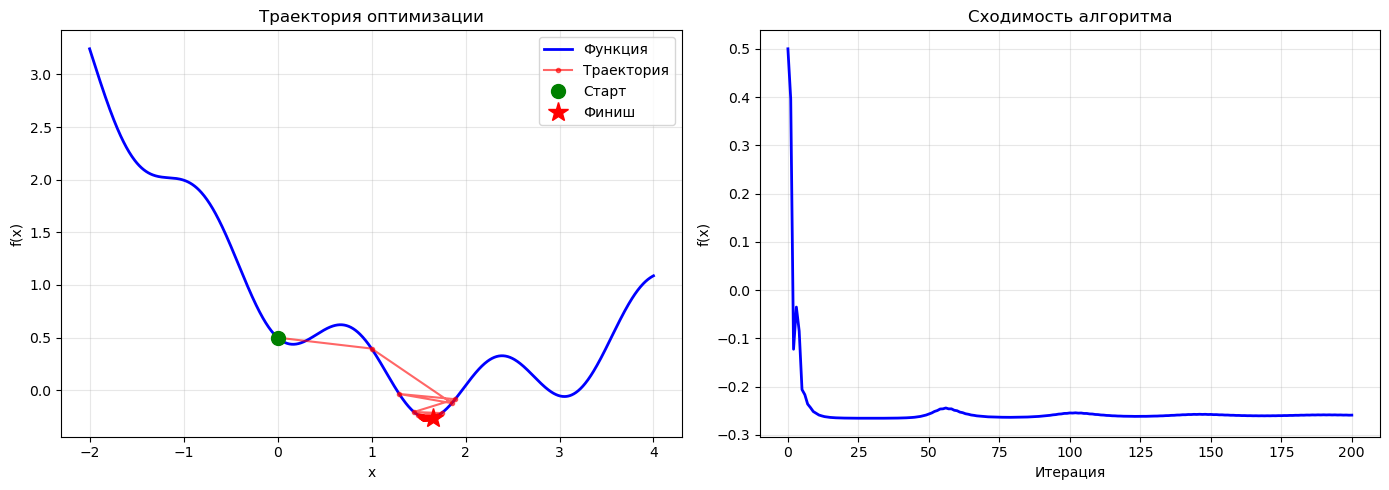

Начальное значение: x = 0.0000, f(x) = 0.5000
Конечное значение: x = 1.6554, f(x) = -0.2592


In [ ]:
# 4
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return 0.2 * (x - 2) ** 2 - 0.3 * torch.cos(4 * x)


lr = 0.1 # шаг обучения
x0 = 0.0 # начальное значение точки минимума
N = 200 # число итераций градиентного алгоритма

x = torch.tensor([x0], requires_grad=True, dtype=torch.float32)
optimizer = optim.RMSprop([x], lr=lr)

# Списки для сохранения истории
x_history = [x.item()]
y_history = [func(x).item()]

for i in range(N):
    y = func(x)
    y.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    # Сохраняем значения
    x_history.append(x.item())
    y_history.append(func(x).item())

# Создаем два графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Функция и траектория оптимизации
x_range = np.linspace(-2, 4, 1000)
y_range = [func(torch.tensor([xi])).item() for xi in x_range]

ax1.plot(x_range, y_range, 'b-', linewidth=2, label='Функция')
ax1.plot(x_history, y_history, 'ro-', markersize=3, alpha=0.6, label='Траектория')
ax1.plot(x_history[0], y_history[0], 'go', markersize=10, label='Старт')
ax1.plot(x_history[-1], y_history[-1], 'r*', markersize=15, label='Финиш')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Траектория оптимизации')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Значение функции от итерации
ax2.plot(y_history, 'b-', linewidth=2)
ax2.set_xlabel('Итерация')
ax2.set_ylabel('f(x)')
ax2.set_title('Сходимость алгоритма')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Начальное значение: x = {x0:.4f}, f(x) = {y_history[0]:.4f}")
print(f"Конечное значение: x = {x_history[-1]:.4f}, f(x) = {y_history[-1]:.4f}")

In [6]:
# 5
import numpy as np
import torch
import torch.optim as optim

n_features = 4 # число коэффициентов w
x = torch.arange(-3, 3, 0.1)
y_train = -0.1 * x + 0.2 * torch.sin(2 * x) - 0.1 * torch.cos(5 * x)
x_train = torch.tensor([[_x ** _n for _n in range(n_features)] for _x in x])

w = torch.FloatTensor(n_features).uniform_(-1e-5, 1e-5)
w.requires_grad_(True)

total = len(y_train)
lr = 0.01 # шаг обучения
N = 1000 # число итераций алгоритма SGD

np.random.seed(1) # установка "зерна" генератора датчика случайных чисел

# Фукции потерь
loss_function = torch.nn.MSELoss() #cредний квадрат ошибки

# Отпимизатор
optimizer = optim.RMSprop([w],lr=lr)

# здесь продолжайте программу
for i in range(N):
    k = np.random.randint(0, total)
    y = x_train[k] @ w
    loss = loss_function(y, y_train[k])
    loss.backward()

    # Меняем веса
    optimizer.step()

    # Зануляем градиенты
    optimizer.zero_grad()


y_pred = x_train @ w
Q = ((y - y_pred)**2).mean().item()

In [ ]:
# 6
import numpy as np
import torch
import torch.optim as optim

x_train = torch.tensor([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])
y_train = torch.tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])
y_train = y_train.float()

total = len(y_train) # размер обучающей выборки
n_features = 3 # число параметров w0, w1, w2
lr = 0.1 # шаг обучения
N = 500 # число итераций градиентного алгоритма

np.random.seed(1) # установка "зерна" генератора датчика случайных чисел

X = torch.ones(total, 3)
X[:, 1:3] = x_train # матрица формата [(1, x11, x12), (1, x21, x22), ..., (1, xn1, xn2)]

w = torch.empty(n_features).uniform_(-1e-5, 1e-5) # начальные значения вектора w
w.requires_grad_(True)

# здесь продолжайте программу
loss_function  = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam([w], lr=lr)

for i in range(N):
    k = np.random.randint(0, total)
    y_pred = X[k].dot(w)
    loss = loss_function(y_pred, y_train[k])
    # Диффиеренцируем
    loss.backward()
    # Применяем шаг градиента
    optimizer.step()
    # Зануляем градиент
    optimizer.zero_grad()

y_pred_all = X @ w
y_pred_all = (torch.sign(y_pred_all) + 1) / 2

Q = torch.mean( (y_pred_all == y_train).float())

In [ ]:
import numpy as np
import torch
import torch.optim as optim

def model(x, w1, w2, b1, b2):
    x = w1 @ x + b1
    x = torch.tanh(x)
    x = w2 @ x + b2
    return x


np.random.seed(1) # установка "зерна" генератора датчика случайных чисел
torch.manual_seed(123)

W1 = torch.empty(2, 2).normal_(0, 1e-5)
bias1 = torch.rand(2, requires_grad=True)
W2 = torch.empty(1, 2).normal_(0, 1e-5)
bias2 = torch.rand(1, requires_grad=True)

W1.requires_grad_(True)
W2.requires_grad_(True)

# обучающая выборка
n_items = 20
C00 = torch.empty(n_items, 2).normal_(0, 1)
C11 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 5])
C01 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([0, 5])
C10 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 0])

x_train = torch.cat([C00, C11, C01, C10])
y_train = torch.cat([torch.ones(n_items * 2), torch.zeros(n_items * 2)])

lr = 0.01  # шаг обучения
N = 1000  # число итераций при обучении
total = y_train.size(0) # размер обучающей выборки

# здесь продолжайте программу
loss_function  = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam([W1, W2, bias1, bias2], lr=lr)

for _ in range(N):
    k = np.random.randint(0, total)
    y_pred  = model(x_train[k], W1, W2, bias1, bias2)
    y_train_k =  y_train[k].float()
    loss = loss_function(y_pred ,y_train_k.unsqueeze(0))
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Q = 0
for x, d in zip(x_train, y_train):
    pred = model(x, W1,W2, bias1, bias2)
    Q += (torch.sign(pred) == (d*2-1)).int().item()

Q = Q / (n_items * 4)
# y_pred_all = (x_train @ W1) + bias1
# y_pred_all = torch.tanh(y_pred_all)
# y_pred_all = (W2 @ x_train.t()).squeeze_()

# y_pred_all = (torch.sign(y_pred_all) + 1) / 2

In [16]:
y_pred.shape

torch.Size([1])